# Named Entity Recognition on News Articles
### R21EF155

In [ ]:
#Import Pandas Module
import pandas as pd

#Creating a DataFrame to read the CSV file
df = pd.read_csv("/content/Articles_Small.csv", encoding='latin-1')

df.head()

,ï»¿Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [ ]:
#Merging all the Columns into a "Text" column
df['Text'] = df['Article'].astype(str) + ' ' + df['Date'].astype(str) + ' ' + df['Heading'].astype(str) + ' ' + df['NewsType'].astype(str)
df.head()

,Article,Date,Heading,NewsType,Text
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business,KARACHI: The Sindh government has decided to b...
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business,HONG KONG: Asian markets started 2015 on an up...
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business,HONG KONG: Hong Kong shares opened 0.66 perce...
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business,HONG KONG: Asian markets tumbled Tuesday follo...
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business,NEW YORK: US oil prices Monday slipped below $...


In [ ]:
df['Text'].iloc[0]

'KARACHI: The Sindh government has decided to bring down public transport fares by 7 per cent due to massive reduction in petroleum product prices by the federal government, Geo News reported.Sources said reduction in fares will be applicable on public transport, rickshaw, taxi and other means of traveling.Meanwhile, Karachi Transport Ittehad (KTI) has refused to abide by the government decision.KTI President Irshad Bukhari said the commuters are charged the lowest fares in Karachi as compare to other parts of the country, adding that 80pc vehicles run on Compressed Natural Gas (CNG). Bukhari said Karachi transporters will cut fares when decrease in CNG prices will be made.                        \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n 1/1/2015 sindh govt decides to cut public transport fares by 7pc kti rej business'

In [ ]:
#Dropping the first 4 columns
df.drop(columns=['Article', 'Date', 'Heading','NewsType'], inplace=True)
df.head()

,Text
0,KARACHI: The Sindh government has decided to b...
1,HONG KONG: Asian markets started 2015 on an up...
2,HONG KONG: Hong Kong shares opened 0.66 perce...
3,HONG KONG: Asian markets tumbled Tuesday follo...
4,NEW YORK: US oil prices Monday slipped below $...


In [ ]:
print(df)

                                                 Text
0   KARACHI: The Sindh government has decided to b...
1   HONG KONG: Asian markets started 2015 on an up...
2   HONG KONG:  Hong Kong shares opened 0.66 perce...
3   HONG KONG: Asian markets tumbled Tuesday follo...
4   NEW YORK: US oil prices Monday slipped below $...
5   New York: Oil prices tumbled Tuesday to fresh ...
6   KARACHI: Strong bulls on Friday pulled the ben...
7   Singapore: Oil fell further in Asia Monday, wi...
8   KARACHI: Wholesale market rates for sugar drop...
9   SYDNEY: Oil prices fell 1 percent on Wednesday...
10  TOKYO: Tokyo stocks opened 0.74 percent lower ...
11  HONG KONG: Hong Kong stocks edged up 0.24 perc...
12  London: World oil prices rebounded Friday afte...
13  ISLAMABAD: Long queues of vehicles on fuel sta...
14  SINGAPORE: Brent crude oil prices traded aroun...
15  ISLAMABAD: A two member committee tasked to pr...
16  ISLAMABAD: The National Electric Power Regulat...
17  Hong Kong: Asian markets

In [123]:
# Get the text column
text_list = df["Text"].to_list()

print(len(text_list))

31


In [124]:
#stopwords removed; tokenization performed
#the text_list is iterated to create tokens from which stopwords are removed a list of only relevant words is stored
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
sw=set(stopwords.words('english'))

text_without_sw = []
for text in text_list:
  tokens = word_tokenize(text)
  text_without_sw.extend([w.lower() for w in tokens if w.lower() not in sw])  # Extend with filtered words

print(text_without_sw[:50])
print(len(text_list))

['karachi', ':', 'sindh', 'government', 'decided', 'bring', 'public', 'transport', 'fares', '7', 'per', 'cent', 'due', 'massive', 'reduction', 'petroleum', 'product', 'prices', 'federal', 'government', ',', 'geo', 'news', 'reported.sources', 'said', 'reduction', 'fares', 'applicable', 'public', 'transport', ',', 'rickshaw', ',', 'taxi', 'means', 'traveling.meanwhile', ',', 'karachi', 'transport', 'ittehad', '(', 'kti', ')', 'refused', 'abide', 'government', 'decision.kti', 'president', 'irshad', 'bukhari']
31


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
#Lemmatizing the tokenized words
from nltk.stem import WordNetLemmatizer as wnl
#wordnet relixes on wordList lexical database to form lemmas

nltk.download('wordnet')
lem=wnl()
print([lem.lemmatize(i) for i in text_without_sw])

['karachi', ':', 'sindh', 'government', 'decided', 'bring', 'public', 'transport', 'fare', '7', 'per', 'cent', 'due', 'massive', 'reduction', 'petroleum', 'product', 'price', 'federal', 'government', ',', 'geo', 'news', 'reported.sources', 'said', 'reduction', 'fare', 'applicable', 'public', 'transport', ',', 'rickshaw', ',', 'taxi', 'mean', 'traveling.meanwhile', ',', 'karachi', 'transport', 'ittehad', '(', 'kti', ')', 'refused', 'abide', 'government', 'decision.kti', 'president', 'irshad', 'bukhari']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Importing the spaCy english model
import spacy

#Downloading spaCy english model
!python -m spacy download en_core_web_sm

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
#Applying NER using a function that takes a list of tokens, creates a spaCy doc and then extracts named entities

def NER(tokens):

  #Creating the doc
  doc = nlp(" ".join(tokens))

  # Extract named entities and their labels
  entities = [(ent.text, ent.label_) for ent in doc.ents]

  return entities

tokens = text_without_sw
results = NER(tokens)




In [127]:
#Printing the Entities(only first 15)
entity_count = 0
for entity in results:
  entity_text, entity_label = entity  # Unpack entity (text, label)
  print(f"Entity: {entity_text}, Classification: {entity_label}")
  entity_count += 1
  if entity_count == 16:
    break

Entity: karachi, Classification: ORG
Entity: 7 per cent, Classification: MONEY
Entity: geo news reported.sources, Classification: ORG
Entity: kti, Classification: ORG
Entity: karachi compare parts country, Classification: ORG
Entity: bukhari, Classification: PERSON
Entity: karachi transporters cut, Classification: ORG
Entity: 1/1/2015, Classification: DATE
Entity: 7pc kti, Classification: ORG
Entity: hong kong, Classification: GPE
Entity: asian, Classification: NORP
Entity: 2015, Classification: DATE
Entity: friday, Classification: DATE
Entity: chinese, Classification: NORP
Entity: hong kong, Classification: GPE
Entity: beijing, Classification: GPE


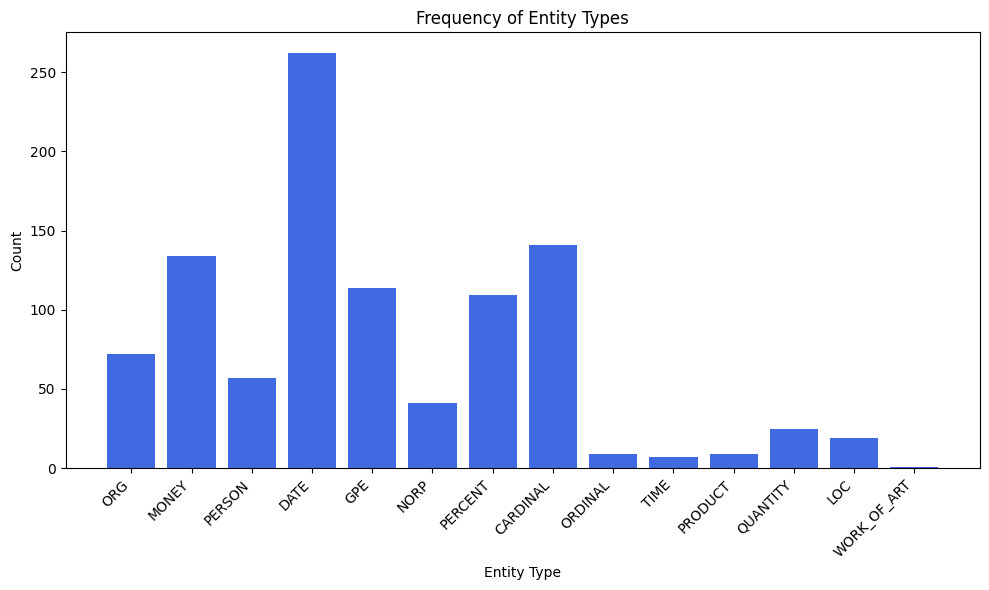

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Extract entity labels and counts
entity_labels = [entity[1] for entity in results]  # Access label at index 1
entity_counts = Counter(entity_labels)

# Extract labels and counts as separate lists
entity_label_list = list(entity_counts.keys())
entity_count_list = list(entity_counts.values())

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(entity_label_list, entity_count_list, color='royalblue')
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("Frequency of Entity Types")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

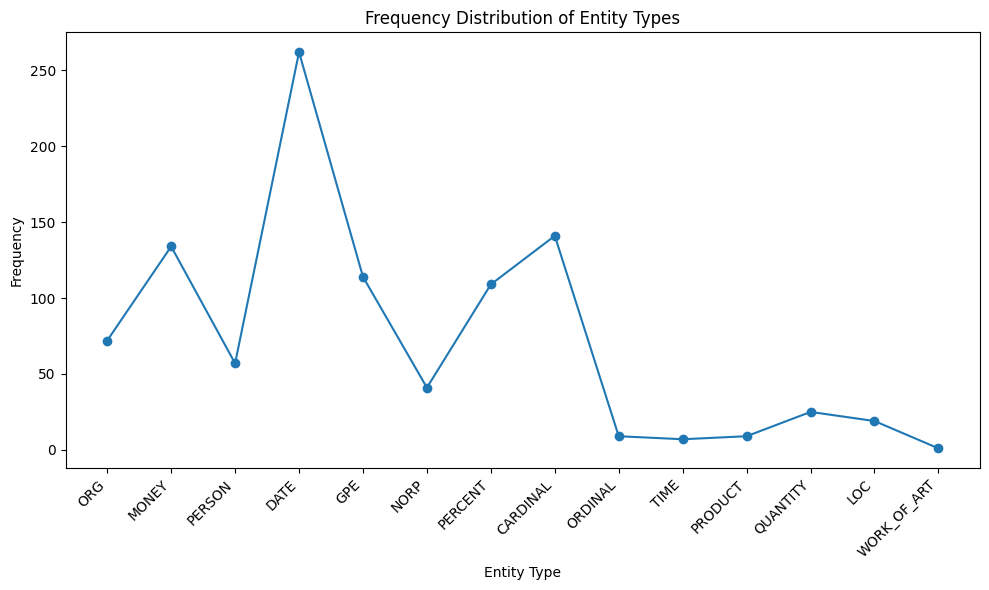

In [ ]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt


entity_labels = [entity[1] for entity in results]  # Access entity label at index 1

# Create a FreqDist object to count entity label occurrences
fdist = FreqDist(entity_labels)

# Extract entity labels and counts from FreqDist
entity_labels = list(fdist.keys())
entity_counts = list(fdist.values())

# Create a line graph to visualize the frequency distribution
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(entity_labels, entity_counts, marker='o', linestyle='-')  # Line with markers
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Entity Types")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#Frequency Distribution of the NER
from collections import Counter


entity_labels = [entity[1] for entity in results]  # Access entity labels at index 1

# Create a Counter object to count entity label occurrences
entity_counts = Counter(entity_labels)

# Print the frequency distribution
print("Entity Type Frequency:")
for entity, count in entity_counts.items():
  print(f"{entity}: {count}")

Entity Type Frequency:
ORG: 72
MONEY: 134
PERSON: 57
DATE: 262
GPE: 114
NORP: 41
PERCENT: 109
CARDINAL: 141
ORDINAL: 9
TIME: 7
PRODUCT: 9
QUANTITY: 25
LOC: 19
WORK_OF_ART: 1


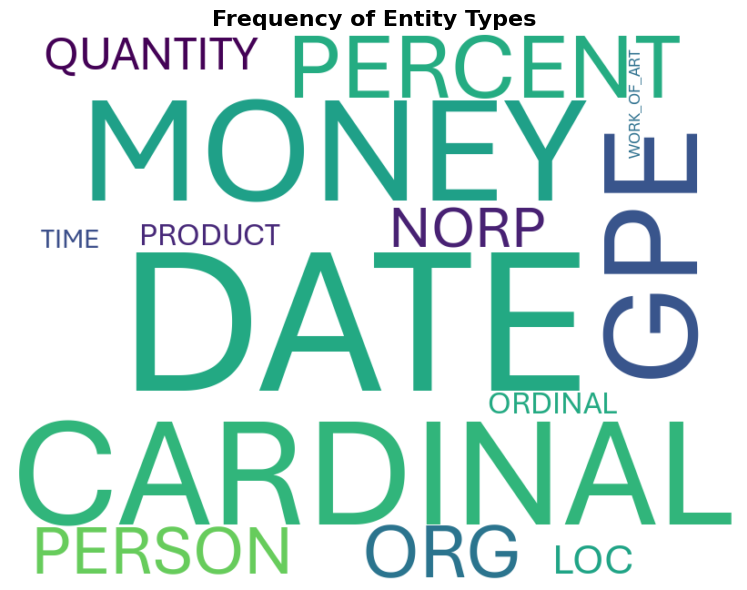

In [ ]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Extract entity labels and counts
entity_labels = [entity[1] for entity in results]  # Access label at index 1
entity_counts = Counter(entity_labels)

# Create a WordCloud with customizations
font_path = "/content/aptos.ttf"
wordcloud = WordCloud(
    width=800,
    height=600,
    stopwords=stopwords,
    background_color="white",
    font_path=font_path,  # Comment out if not using custom font
    colormap="viridis",  # Choose a visually appealing colormap
    collocations=False,  # Avoid unwanted word combinations
    max_words=200,  # Limit the number of words to prevent overcrowding
    prefer_horizontal=0.9,  # Encourage horizontal orientation for better readability
    min_font_size=10  # Set a minimum font size for better visibility
    ).generate_from_frequencies(entity_counts)

# Create a matplotlib figure
plt.figure(figsize=(8, 6))

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.title("Frequency of Entity Types", fontsize=16, fontweight="bold")  # Adjust title style
plt.tight_layout()
plt.show()